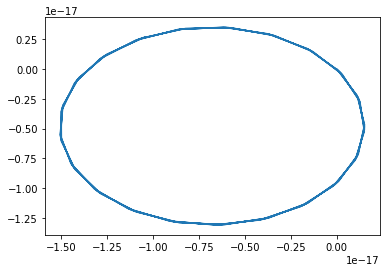

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

class Omniwheel:
    def __init__(self, px, py, theta, l, r, dT):
        self.px = px
        self.py = py
        self.theta = theta
        self.l = l
        self.r = r
        self.dT = dT
        self.vx = 0
        self.vy = 0
        self.omega = 0
        self.vw = np.matrix([0, 0, 0])

    def forward_kinematics(self, vw):
        self.vw = vw
        rMatrix = np.matrix([[math.sin(math.pi/3), math.sin(math.pi), math.sin(5*math.pi/3)],
                             [-math.cos(math.pi/3), -math.cos(math.pi), -math.cos(5*math.pi/3)],
                             [-1/self.l, -1/self.l, -1/self.l]])
        vMatrix = rMatrix.dot(vw)
        self.vx = vMatrix.item(0)
        self.vy = vMatrix.item(1)
        self.omega = vMatrix.item(2)

    def inverse_kinematics(self, vx, vy, omega):
        self.vx = vx
        self.vy = vy
        self.omega = omega
        rMatrix = np.matrix([[math.sin(math.pi/3), -math.cos(math.pi/3), -1/self.l],
                             [math.sin(math.pi), -math.cos(math.pi), -1/self.l],
                             [math.sin(5*math.pi/3), -math.cos(5*math.pi/3), -1/self.l]])
        vMatrix = np.matrix([vx, vy, omega]).T
        vw = np.linalg.inv(rMatrix).dot(vMatrix)
        self.vw = vw.T.tolist()[0]

    def update(self):
        angle = self.theta * math.pi / 180
        self.px += self.vx * self.dT * math.cos(angle) + self.vy * self.dT * math.cos(angle + math.pi/2)
        self.py += self.vx * self.dT * math.sin(angle) + self.vy * self.dT * math.sin(angle + math.pi/2)
        self.theta += self.omega * self.dT * 180 / math.pi

    def simulate(self, steps):
        px_arr = [self.px]
        py_arr = [self.py]
        for i in range(steps):
            self.update()
            px_arr.append(self.px)
            py_arr.append(self.py)
        plt.plot(px_arr, py_arr)
        plt.show()

omni = Omniwheel(0, 0, 0, 0.1, 0.03, 0.01)
omni.forward_kinematics([1, 1, 1])
omni.simulate(100)
